# How To Create and Use Data Structures
### This notebook organizes the TMSi data into data structures you can interface with more easily through python. In this beggining section, I will only show how to create and use the data structure through a function I built. The following section will show how I created the function in case you want to see how it works, but the goal was that you did not have to.
### The function is called *mats2dict( )* which finds .mat files in a directory (default: ./data/raw) and will structure the information available in all .mat files to a dictionary that maps all subjects to their recordings. The function just requires one line of code to create the subject data structure.

In [7]:
from src.routines import *

subject = mats2dict()

### The function will take a while to run, but it makes accessing the data easy. The dictionary is organized like:
## subjects[ID][Channel][Samples]

### The only thing that will take additional thinking from your part will be how you select your samples. In this example I show how to get an arbitrary time interval from the data. The *.csv* file specifies these intervals and can then be used to extract swallows from the data. I will implement tools for this later, but for now you have to select your interval manually.

Text(0, 0.5, 'Voltage (mV)')

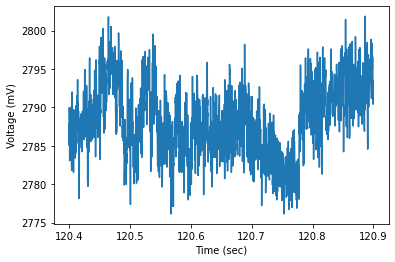

In [34]:
# Indeces to interface with data structure
id = 1          # Subject ID
channel = 10    # Channel of interest
interval = 120.4,120.9  # Interval of time in seconds

# Get sample indeces from interval
fs = 4000                                       # Experiment sampling frequency.
interval = [int(x*fs) for x in interval]        # Convert interval to samples. 
time = np.arange(*interval)/fs                  # Compute time vector

# Get data for ONE channel and an interval range
data = subject[id][channel][range(*interval)]   # Get data by specifying [id][channel][sample range]

import matplotlib.pyplot as plt                 # Plot stuff
plt.plot(time,data)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')

### In case you want to plot a subset of channels. For some technical reason you have to use *np.ix_()*, but here is the template.

Text(0, 0.5, 'Voltage (mV)')

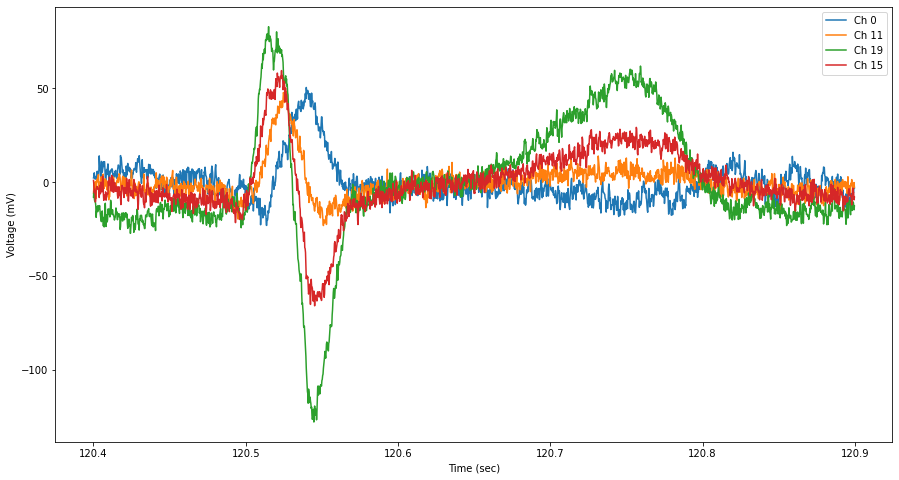

In [35]:
# List of channels to plot
channels = [0,11,19,15]

# Get data for a subset of channels and interval
data = subject[id][np.ix_(channels,range(*interval))]

# Plot stuff
plt.figure(figsize=(15,8))
for signal in data:
    plt.plot(time,signal-signal.mean())
plt.legend(['Ch '+str(x) for x in channels])
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')

Text(0, 0.5, 'Voltage (mV)')

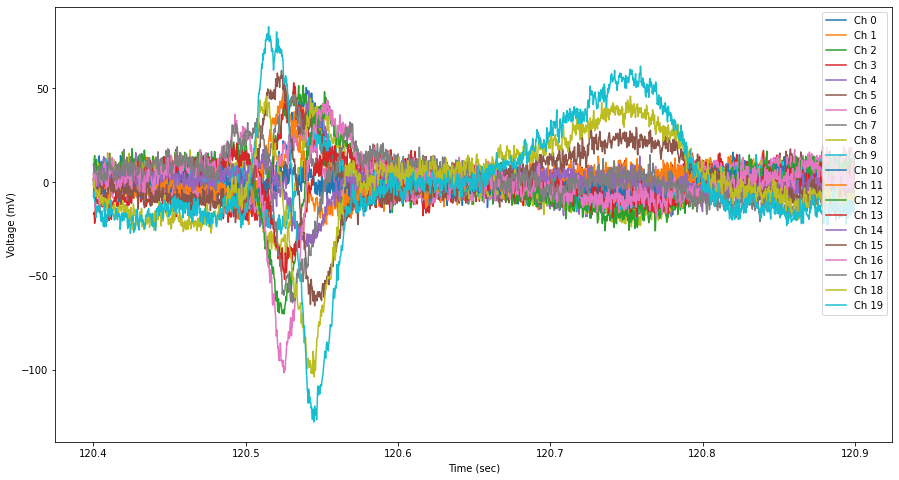

In [36]:
# Get data for all channels with a specified interval
data = subject[id][:,range(*interval)]

# Plot stuff
plt.figure(figsize=(15,8))
for signal in data:
    plt.plot(time,signal-signal.mean())
plt.legend(['Ch '+str(x) for x in range(20)])
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (mV)')

# Building *mats2dict()* function.
## How to import .mat files.
### To import the MATLAB files we can use a function from scipy's input and output package [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html#scipy.io.loadmat). This package contains a function called *loadmat( )* that imports the file into a dictionary -- learn more about them [here](https://www.w3schools.com/python/python_dictionaries.asp). 

In [27]:
import scipy.io as sio

filename = 'S1E0810_Sw.mat'
directory = 'data/raw/'+filename
mat_contents = sio.loadmat(directory)

print(mat_contents.keys())
print("\nValue 'newdata' is a numpy array: \n",mat_contents['newdata'])

dict_keys(['__header__', '__version__', '__globals__', 'newdata'])

Value 'newdata' is a numpy array: 
 [[ -6811.95898438  -6811.20703125  -6818.97509766 ...      0.
       0.              0.        ]
 [ -1527.22595215  -1527.56005859  -1524.46960449 ...      0.
       0.              0.        ]
 [-11272.01953125 -11271.93652344 -11274.69238281 ...      0.
       0.              0.        ]
 ...
 [  5333.34619141   5332.67822266   5326.74755859 ...      0.
       0.              0.        ]
 [   721.93249512    723.68658447    722.01605225 ...      0.
       0.              0.        ]
 [ -5736.45263672  -5733.02783203  -5732.77685547 ...      0.
       0.              0.        ]]


### The most interesting part to us is the *'newdata'* key since its values correspond to the recording.

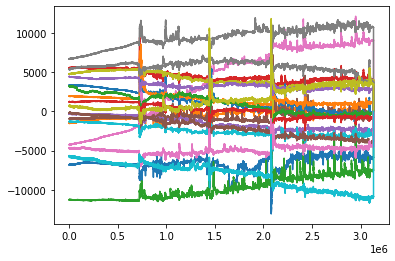

In [6]:
import matplotlib.pyplot as plt 

recording = mat_contents['newdata']
plt.plot(recording.T)
plt.show()

## How to read files from a directory.
### The goal now is to identify a folder where we will dump all .mat files and import from it. The following code finds all .mat files from the directory *./data/raw/* 

In [3]:
import os

# Get matlab files from the folder storing all raw data.
files = os.listdir('./data/raw/')   # List all files in the raw data dump.
mat_files = [file for file in files if file[-4:] == '.mat'] # Get all files with the extension .mat

print(mat_files)

['S1E0810_Sw.mat', 'S2E0811_Sw.mat', 'S3E0820_Sw.mat', 'S4E0811_Sw.mat', 'S5E0813_Sw.mat', 'S6E0825_Sw.mat']


## Creating a dictionary structure.
### Now we can create a dictionary with the keys being the subject IDs and its values being the channel recordings. I decided to store the recordings as numpy arrays since indexing with time should be easier. Additionally, numpy interfaces really well with signal processing packages and visualization tools available in python.

In [15]:
import numpy as np

subject = {}    # Initialize an empty dictionary.
for filename in mat_files:  # Iterate across matlab files from our data/raw directory
    directory = 'data/raw/'
    recording = sio.loadmat(directory+filename)['newdata']
    id = int(filename[1])   # Get subject ID from filename (could be better, but it works) 
    subject[id] = np.array(recording) # Assign subject id to its recording numpy array with shape (Channels, Time)

print(subject.keys())

dict_keys([1, 2, 3, 4, 5, 6])


## Building a function.
### We can now stitch the code we just built into a *mats2dict( )* function, so we can call it everytime we start a different notebook.

```
def mats2dict(dir = './data/raw'):
    files = os.listdir(dir)   
    mat_files = [file for file in files if file[-4:] == '.mat'] 

    subject = {}   
    for filename in mat_files:  
        directory = 'data/raw/'
        recording = sio.loadmat(directory+filename)['newdata']
        id = int(filename[1])   
        subject[id] = np.array(recording) 
        
    return subjects
```

### This function will search a specified directory (by default ./data/raw) and store all MATLAB files into one dictonary (keys: subjects, values: numpy array recording (Channels, Time)))

In [1]:
subject = mats2dict()